# Examining No Show Appointments in Brazil (Kaggle Challenge)

<a id='intro'></a>
## Introduction

Investigating a data set of appoinment records in public hospitals in Vitoria, Espirito Santo, Brazil. The data includes whether the patient showed up to the appointment, which is the main focus, as well as other attributes of the patient and the appointment.

The data set is provided by JoniHoppen on [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).

### Dataset Description 

110.527 medical appointments, 62.299 unique patients

14 variables:
- Patient ID
- Appointment ID
- Gender
- AppointmentDay (day of appointment)
- ScheduledDay (day of making the appointment)
- Age
- Neighborhood (location of the hospital)
- Scholarship (welfare program Bolsa Família)
- Hipertension
- Diabetis
- Alcoholism 
- Handcap
- SMS_received (1 ore more reminder text messages)
- No-show



### Table of Contents


<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>

<li><a href="#q1">Q1: Which variables have a strong correlation with no-shows?</a></li>
<li><a href="#q2">Q2: Does the waiting time betweeen scheduling and appointment play a role?</a></li>
<li><a href="#q3">Q3: Could SMS reminder help to prevent no-shows?</a></li>
<li><a href="#q4">Q4: Can past no-shows predict future noshows?</a></li>
<li><a href="#q5">Q5: DHow is age related to no-shows?</a></li>
    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

    
Extras, for futher analysis:
- Does the day of the week and hour (of the appointment) play a role?
- Do certain diseases/disability/addcition correlate with no-shows?


This Notebook will present summary statistics and plots to answer the questions above.



In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


In [3]:
# Load data
df = pd.read_csv('/Users/lisa/Documents/1 - Uni Online/22-02 Udacity - Data Analysis Nanodegree/4-Data-Analysis-Process/predicting_no_show_appointments/noshowappointments-kagglev2-may-2016.csv', parse_dates=True)
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
# inspect data types and look for missing values
df.dtypes, df.shape, df.isnull().sum()

(PatientId         float64
 AppointmentID       int64
 Gender             object
 ScheduledDay       object
 AppointmentDay     object
 Age                 int64
 Neighbourhood      object
 Scholarship         int64
 Hipertension        int64
 Diabetes            int64
 Alcoholism          int64
 Handcap             int64
 SMS_received        int64
 No-show            object
 dtype: object,
 (110527, 14),
 PatientId         0
 AppointmentID     0
 Gender            0
 ScheduledDay      0
 AppointmentDay    0
 Age               0
 Neighbourhood     0
 Scholarship       0
 Hipertension      0
 Diabetes          0
 Alcoholism        0
 Handcap           0
 SMS_received      0
 No-show           0
 dtype: int64)

- There are no missing values
- A few spelling errors could be corrected
- The datatypes of the date variables need too be tackled
- A new Variable for waiting time needs to be created
- Transform all objects into integers?

### Data Cleaning

In [5]:
# Correcting Variable Names
df = df.rename(columns={"Hipertension": "Hypertension", "Handcap": "Handicap", "SMS_received": "SMS", "No-show": "Noshow"})
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Creating Data

#### New columns for date and time in datetime format

In [6]:
df[['Scheduled_Day', 'Scheduled_Hour']] = df['ScheduledDay'].str.split('T', expand=True)
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day']).dt.date
df['Scheduled_Hour'] = pd.to_datetime(df['Scheduled_Hour']).dt.time
df['Appointment_Day'] = pd.to_datetime(df['AppointmentDay']).dt.date
del df['ScheduledDay']
del df['AppointmentDay']
df.head(5)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Noshow,Scheduled_Day,Scheduled_Hour,Appointment_Day
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,2016-04-29
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04,2016-04-29
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31,2016-04-29
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23,2016-04-29


In [7]:
df.dtypes # there is still a problem with the datetime format....

PatientId          float64
AppointmentID        int64
Gender              object
Age                  int64
Neighbourhood       object
Scholarship          int64
Hypertension         int64
Diabetes             int64
Alcoholism           int64
Handicap             int64
SMS                  int64
Noshow              object
Scheduled_Day       object
Scheduled_Hour      object
Appointment_Day     object
dtype: object

In [8]:
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
# df['Scheduled_Hour'] = pd.to_datetime(df['Scheduled_Hour'])    # hour is not convertible to datetime!?
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

#### New Columns for Days of the Week

In [9]:
df['Appointment_Weekday'] = (df.Appointment_Day.dt.dayofweek)
df['Scheduled_Weekday'] = (df.Scheduled_Day.dt.dayofweek)

Mondays are 0 and Sundays are 6

#### Creating Column for the waiting days between Scheduled and Appointment

In [10]:
# substract scheduled date from appointment date
df['Waiting_Days']=df['Appointment_Day']-df['Scheduled_Day']

In [11]:
df.Waiting_Days.describe() # there should not be negative values

count                        110527
mean     10 days 04:24:31.828602965
std      15 days 06:07:11.673762786
min               -6 days +00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: Waiting_Days, dtype: object

In [12]:
# change datatype from string to datetime to integer
df.Waiting_Days = ((df.Waiting_Days.astype('timedelta64[D]')).astype(int))

In [13]:
# check for negative values
df.loc[df['Waiting_Days'] < 0]

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Noshow,Scheduled_Day,Scheduled_Hour,Appointment_Day,Appointment_Weekday,Scheduled_Weekday,Waiting_Days
27033,7.839273e+12,5679978,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-10,10:51:53,2016-05-09,0,1,-1
55226,7.896294e+12,5715660,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-18,14:50:41,2016-05-17,1,2,-1
64175,2.425226e+13,5664962,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-05,13:43:58,2016-05-04,2,3,-1
71533,9.982316e+14,5686628,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-11,13:49:20,2016-05-05,3,2,-6
72362,3.787482e+12,5655637,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-04,06:50:57,2016-05-03,1,2,-1


In [14]:
# drop those 5 rows
negatives = df[ df['Waiting_Days'] < 0 ].index
df.drop(negatives, inplace=True)
df.shape

(110522, 18)

#### New binary columns for Neighbourhoods

In [15]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [16]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

too many neighbourhoods! 

In [17]:
del df['Neighbourhood']

### Numerical Variable for Gender

In [18]:
df['Women'] = df['Gender'] == 'F'
df['Women'] = df['Women'].astype(int)
del df['Gender']

### Numercial Variable for Noshow

In [19]:
df.Noshow.value_counts()

No     88208
Yes    22314
Name: Noshow, dtype: int64

In [20]:
df['No_show'] = df['Noshow'] == 'Yes'
df['No_show'] = df['No_show'].astype(int)
del df['Noshow']

In [21]:
df.No_show.value_counts()

0    88208
1    22314
Name: No_show, dtype: int64

In [22]:
df.head(1)

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Scheduled_Day,Scheduled_Hour,Appointment_Day,Appointment_Weekday,Scheduled_Weekday,Waiting_Days,Women,No_show
0,2.987250e+13,5642903,62,0,1,0,0,0,0,2016-04-29,18:38:08,2016-04-29,4,4,0,1,0


### Number of no-shows per Patient

In [23]:
# noshow counts per patient
df_test2 = df.groupby('PatientId').No_show.sum()
df_test2

PatientId
3.921784e+04    0
4.374176e+04    0
9.377953e+04    0
1.417242e+05    0
5.376153e+05    0
               ..
9.999320e+14    0
9.999350e+14    0
9.999465e+14    0
9.999686e+14    0
9.999816e+14    0
Name: No_show, Length: 62299, dtype: int64

In [24]:
# transform Series into Dataframe
noshow_count = pd.DataFrame(df_test2).reset_index()
noshow_count = noshow_count.rename(columns= {'No_show': 'Noshow_count'})
noshow_count.head()

,PatientId,Noshow_count
0,39217.84439,0
1,43741.75652,0
2,93779.52927,0
3,141724.16655,0
4,537615.28476,0


In [25]:
# check whether noshow-count is plausible! 1-18 no shows per patient, no cases with 0 no show??
noshow_count.Noshow_count.value_counts()

0     44638
1     14438
2      2415
3       516
4       162
5        58
6        33
7        13
8         9
11        4
10        4
9         3
12        1
13        1
14        1
15        1
16        1
18        1
Name: Noshow_count, dtype: int64

In [26]:
# recode all cases with 5 or more noshows as 5 (low case count at high numbers 5+ is bad for analysis)
noshow_count[noshow_count.Noshow_count >5]=5

In [27]:
# check value counts again
noshow_count.Noshow_count.value_counts()

0    44638
1    14438
2     2415
3      516
4      162
5      130
Name: Noshow_count, dtype: int64

In [28]:
# merge with original dataframe
df = df.merge(noshow_count)

In [29]:
df.shape 

(109660, 18)

In [30]:
# random spot check 
df.loc[819]

PatientId                  5674371795924.0
AppointmentID                      5762973
Age                                     54
Scholarship                              0
Hypertension                             0
Diabetes                                 0
Alcoholism                               0
Handicap                                 0
SMS                                      0
Scheduled_Day          2016-06-02 00:00:00
Scheduled_Hour                    08:25:27
Appointment_Day        2016-06-03 00:00:00
Appointment_Weekday                      4
Scheduled_Weekday                        3
Waiting_Days                             1
Women                                    1
No_show                                  0
Noshow_count                             0
Name: 819, dtype: object

In [31]:
df.query('PatientId == 2594182728417.0')

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Scheduled_Day,Scheduled_Hour,Appointment_Day,Appointment_Weekday,Scheduled_Weekday,Waiting_Days,Women,No_show,Noshow_count
1776,2.594183e+12,5546336,11,0,0,0,0,0,0,2016-04-05,16:00:06,2016-04-29,4,1,24,0,0,2
1777,2.594183e+12,5546335,11,0,0,0,0,0,1,2016-04-05,15:59:53,2016-04-29,4,1,24,0,0,2
1778,2.594183e+12,5762354,11,0,0,0,0,0,0,2016-06-02,07:37:13,2016-06-02,3,3,0,0,0,2
1779,2.594183e+12,5756497,11,0,0,0,0,0,0,2016-06-01,08:22:54,2016-06-01,2,2,0,0,0,2
1780,2.594183e+12,5656218,11,0,0,0,0,0,0,2016-05-04,07:46:48,2016-06-08,2,2,35,0,1,2
1781,2.594183e+12,5656210,11,0,0,0,0,0,1,2016-05-04,07:46:23,2016-06-08,2,2,35,0,1,2


In [32]:
# check missings again, OK all  good
df.isnull().sum()

PatientId              0
AppointmentID          0
Age                    0
Scholarship            0
Hypertension           0
Diabetes               0
Alcoholism             0
Handicap               0
SMS                    0
Scheduled_Day          0
Scheduled_Hour         0
Appointment_Day        0
Appointment_Weekday    0
Scheduled_Weekday      0
Waiting_Days           0
Women                  0
No_show                0
Noshow_count           0
dtype: int64

### Number of appointments per Patient

In [33]:
# noshow counts per patient
df1 = df.PatientId.value_counts()
df1

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
                ..
5.624536e+13     1
5.978944e+13     1
6.811561e+13     1
5.981285e+12     1
5.133834e+14     1
Name: PatientId, Length: 62227, dtype: int64

In [34]:
# transform Series into DataFrame
a_count = pd.DataFrame(df1).reset_index()
a_count = a_count.rename(columns= {'index': 'PatientId', 'PatientId': 'appointment_count'})
a_count.head()

,PatientId,appointment_count
0,8.221459e+14,88
1,9.963767e+10,84
2,2.688613e+13,70
3,3.353478e+13,65
4,2.584244e+11,62


In [35]:
# check whether appointment-count is plausible! 1-18 no shows per patient, no cases with 0 no show??
a_count.appointment_count.value_counts()

1     37921
2     13895
3      5499
4      2369
5      1117
6       548
7       298
8       188
9        98
10       82
11       57
12       32
13       30
14       19
15       11
17        9
16        8
18        6
20        5
19        4
62        4
21        2
30        2
34        2
42        2
46        2
54        1
29        1
57        1
88        1
24        1
55        1
23        1
33        1
22        1
84        1
38        1
51        1
70        1
50        1
37        1
65        1
40        1
Name: appointment_count, dtype: int64

most patients (37921) only had 1 appointment in their history

In [36]:
# merge with original dataframe
df = df.merge(a_count)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Q1: Which variables have a strong correlation with no-shows?

In [37]:
df1 = df.iloc[0::, 2::] #df without patientID and appointmentID
df1.head(2)

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Scheduled_Day,Scheduled_Hour,Appointment_Day,Appointment_Weekday,Scheduled_Weekday,Waiting_Days,Women,No_show,Noshow_count,appointment_count
0,62,0,1,0,0,0,0,2016-04-29,18:38:08,2016-04-29,4,4,0,1,0,0,2
1,62,0,1,0,0,0,0,2016-04-29,09:47:47,2016-04-29,4,4,0,1,0,0,2


<AxesSubplot:>

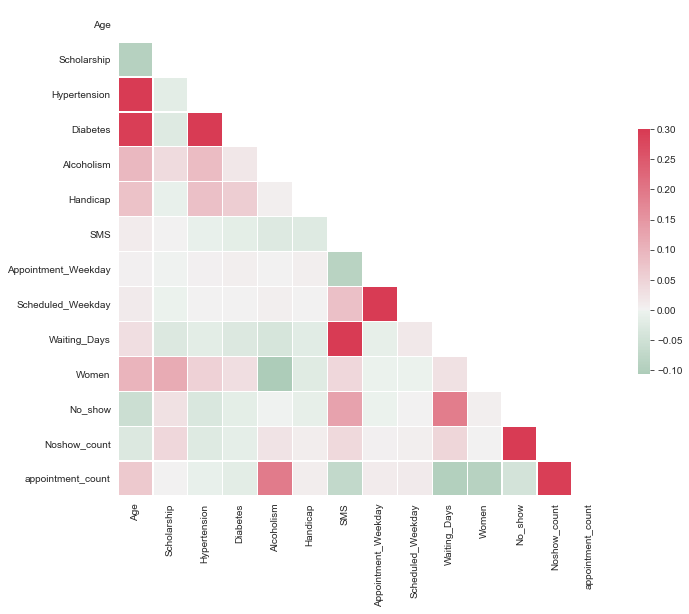

In [38]:
# Compute a correlation matrix, see: http://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df1.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 7, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

relevant no-show predictors are: 
- Waiting Days
- SMS reminder
- Noshow_count
- Age
- (Hypertension / Diabetes / Handicap / Alcoholism / Appointment_Weekday)

these variables dont seem to play a big role:
- Gender
- Scholarship
- Scheduled_Weekday

<a id='q12'></a>
### Q2: Waiting Days and No-Shows

In [39]:
# mean no-show value (is it like probablities here?) per number of waiting days 
noshow_means = pd.DataFrame(df.groupby(['Waiting_Days']).No_show.mean().reset_index())
noshow_means.head(3)

,Waiting_Days,No_show
0,0,0.039467
1,1,0.211409
2,2,0.237083


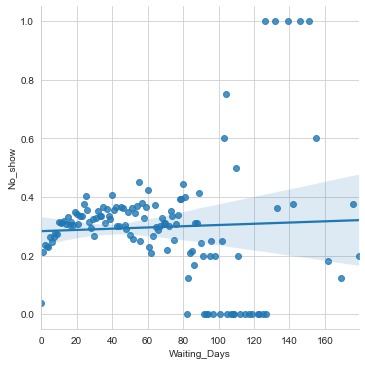

In [40]:
# Scatterplot to visualize the relationship between Waiting Days and No Shows
sns.lmplot(x='Waiting_Days',y='No_show',data=noshow_means,fit_reg=True) 

doesnt look like a strong correlation... cases above 80 days waiting time are wildly distributed.

In [41]:
# recoding all values above 80 days waiting time into NaNs
df['Waiting_Days_80'] = df['Waiting_Days'].apply(lambda x: x if x <= 80 else np.nan)

In [42]:
df.isna().sum()

PatientId                0
AppointmentID            0
Age                      0
Scholarship              0
Hypertension             0
Diabetes                 0
Alcoholism               0
Handicap                 0
SMS                      0
Scheduled_Day            0
Scheduled_Hour           0
Appointment_Day          0
Appointment_Weekday      0
Scheduled_Weekday        0
Waiting_Days             0
Women                    0
No_show                  0
Noshow_count             0
appointment_count        0
Waiting_Days_80        438
dtype: int64

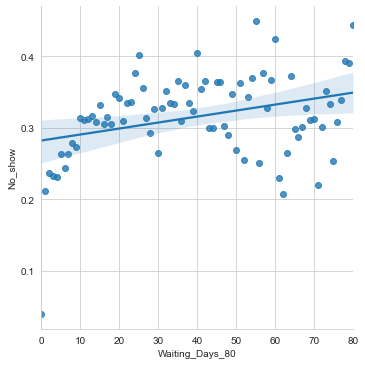

In [43]:
# mean no-show value per number of waiting days (up to 80 days)
noshow_means_80 = pd.DataFrame(df.groupby(['Waiting_Days_80']).No_show.mean().reset_index())

# Scatterplot to visualize the relationship between (up to 80) Waiting Days and No Shows
sns.lmplot(x='Waiting_Days_80',y='No_show',data=noshow_means_80,fit_reg=True) 

here the correlation is much stronger: the longer the waiting time (up to 80 days), the higher the probablility of a no-show!

In [44]:
# mean number of waiting days for no-shows / show-ups
waiting_means = pd.DataFrame(df.groupby(['No_show']).Waiting_Days.mean().reset_index())
waiting_means

,No_show,Waiting_Days
0,0,8.775510
1,1,16.071573


Text(0, 0.5, 'Mean Waiting Days')

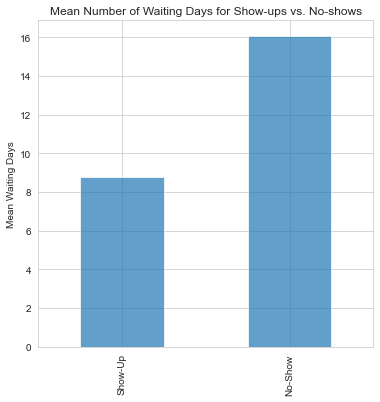

In [45]:
# barchart 
fig = waiting_means['Waiting_Days'].plot(kind='bar', title='Mean Number of Waiting Days for Show-ups vs. No-shows', alpha=.7, figsize=(6,6))
fig.set_xticklabels(['Show-Up', 'No-Show'])
fig.set_ylabel('Mean Waiting Days')

the average waiting time of show ups lies at around 7 days, the average waiting time of no-shows is more than double at about 16 days -->
it is probably advisable to plan appointments rather short-term

<a id='q3'></a>
### Q3: SMS reminder and No-Shows

In [46]:
# Checking numbers of the variable 'SMS reminder', looks binary (No/Yes)
df.SMS.value_counts(), df.SMS.count()

(0    74314
 1    35346
 Name: SMS, dtype: int64,
 109660)

In [47]:
# Checking numbers of show-ups vs. no-shows
df.No_show.value_counts()

0    87906
1    21754
Name: No_show, dtype: int64

In [48]:
# storing sum of show-ups vs no-shows
N_showup = df.query('No_show == 0').shape[0]
N_noshow = df.query('No_show == 1').shape[0]
print(f"Show-ups: {N_noshow}, No-shows: { N_showup}")
# storing sum of SMS not received vs received
N_NoSMS = df.query('SMS == 0').shape[0]
N_SMS = df.query('SMS == 1').shape[0]
print(f"No-SMS: {N_NoSMS}, SMS: { N_SMS}")

Show-ups: 21754, No-shows: 87906
No-SMS: 74314, SMS: 35346


#### No-shows who received / didnt receive SMS

In [49]:
# Count No-shows who received a SMS reminder
N_noshow_SMS = df.query('SMS == 1')['No_show'].sum()
# Count No-shows who DIDN'T receive a SMS reminder
N_noshow_NoSMS = df.query('SMS == 0')['No_show'].sum()
print(f'No-show with SMS: {N_noshow_SMS}, No-show without SMS: {N_noshow_NoSMS} (all no-shows: {N_noshow_NoSMS + N_noshow_SMS})' )

No-show with SMS: 9689, No-show without SMS: 12065 (all no-shows: 21754)


In [50]:
# Percentage of No-shows with / without SMS
N_noshow_SMS / N_noshow *100, N_noshow_NoSMS / N_noshow *100

(44.53893536820814, 55.46106463179186)

44% of noshows did get a SMS reminder, 56% didnt get SMS reminder

In [51]:
# Visualizing Count of No-Shows 
df1 = pd.DataFrame(data=[N_noshow, N_noshow_SMS, N_noshow_NoSMS])

Text(0, 0.5, '')

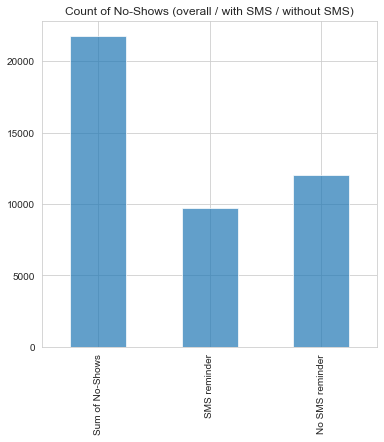

In [52]:
fig = df1[0].plot(kind='bar', title='Count of No-Shows (overall / with SMS / without SMS)', alpha=.7, figsize=(6, 6))
fig.set_xticklabels(['Sum of No-Shows', 'SMS reminder', 'No SMS reminder'])
fig.set_ylabel('')

#### SMS receivers / not receivers who showed up / didnt show up

In [53]:
# Count SMS receivers who showed up
N_SMS_showup = df.query('No_show == 0')['SMS'].sum()
# Count SMS receivers who showed up
N_SMS_noshow = df.query('No_show == 1')['SMS'].sum()
print(f'SMS reveivers who showed up: {N_SMS_showup}, SMS reveivers who didnt show up: {N_SMS_noshow} (all SMS receivers: {N_SMS_noshow + N_SMS_showup})' )

SMS reveivers who showed up: 25657, SMS reveivers who didnt show up: 9689 (all SMS receivers: 35346)


In [54]:
# Count NO-SMS receivers who showed up
N_NoSMS_showup = pd.DataFrame(df.query('No_show == 0 & SMS == 0').count())[0][0]
# Count NO-SMS receivers who DIDNT show up
N_NoSMS_noshow = pd.DataFrame(df.query('No_show == 1 & SMS == 0').count())[0][0]
print(f'NO-SMS reveivers who showed up: {N_NoSMS_showup}, No-SMS reveivers who didnt show up: {N_NoSMS_noshow} (all No-SMS receivers: {N_NoSMS_noshow + N_NoSMS_showup})' )

NO-SMS reveivers who showed up: 62249, No-SMS reveivers who didnt show up: 12065 (all No-SMS receivers: 74314)


In [55]:
df2 = pd.DataFrame(data=[N_SMS, N_SMS_showup, N_SMS_noshow])
df2

,0
0,35346
1,25657
2,9689


Text(0, 0.5, '')

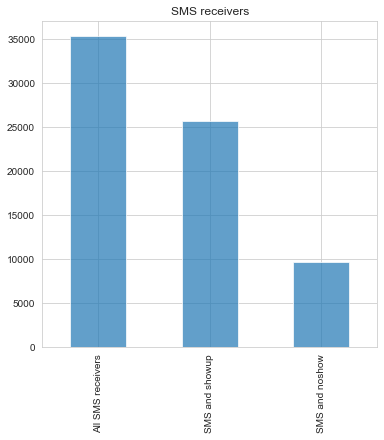

In [56]:
fig = df2[0].plot(kind='bar', title='SMS receivers', alpha=.7, figsize=(6, 6))
fig.set_xticklabels(['All SMS receivers', 'SMS and showup', 'SMS and noshow'])
fig.set_ylabel('')

In [57]:
df3 = pd.DataFrame(data=[N_NoSMS, N_NoSMS_showup, N_NoSMS_noshow])
df3

,0
0,74314
1,62249
2,12065


Text(0, 0.5, '')

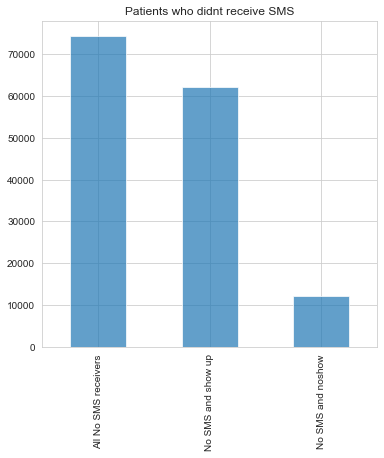

In [58]:
fig = df3[0].plot(kind='bar', title='Patients who didnt receive SMS', alpha=.7, figsize=(6, 6))
fig.set_xticklabels(['All No SMS receivers', 'No SMS and show up', 'No SMS and noshow'])
fig.set_ylabel('')

In [59]:
# Calculate Percentages 
# SMS receivers
perc_SMS_su = N_SMS_showup / N_SMS * 100
perc_SMS_ns = N_SMS_noshow / N_SMS * 100
# No SMS receivers
perc_NoSMS_su = N_NoSMS_showup / N_NoSMS * 100
perc_NoSMS_ns = N_NoSMS_noshow / N_NoSMS * 100

In [60]:
print(f'PERCENTAGES\nSMS + showup: {perc_SMS_su}, SMS + no-show: {perc_SMS_ns}, \nNo SMS + show-up {perc_NoSMS_su}, No SMS + no-show {perc_NoSMS_ns}')

PERCENTAGES
SMS + showup: 72.58812878402082, SMS + no-show: 27.41187121597918, 
No SMS + show-up 83.76483569717685, No SMS + no-show 16.235164302823154


In [61]:
df4 = pd.DataFrame(data=[perc_SMS_su, perc_SMS_ns, perc_NoSMS_su, perc_NoSMS_ns])
df4

,0
0,72.588129
1,27.411871
2,83.764836
3,16.235164


Text(0, 0.5, '')

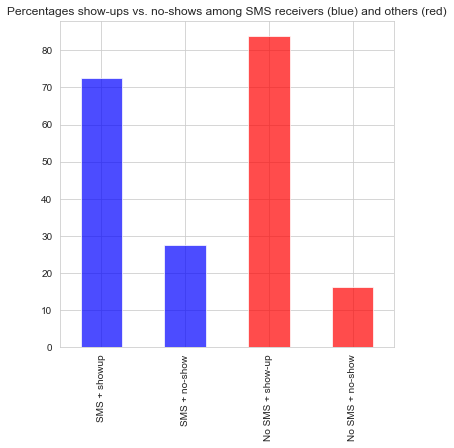

In [62]:
fig = df4[0].plot(kind='bar', stacked=True, title='Percentages show-ups vs. no-shows among SMS receivers (blue) and others (red)', alpha=.7, figsize=(6, 6), color=['blue', 'blue', 'red', 'red',])
fig.set_xticklabels(['SMS + showup', 'SMS + no-show', 'No SMS + show-up', 'No SMS + no-show'])
fig.set_ylabel('')

the percentage of no-shows is higher among SMS receivers. were they preselected?

<a id='q4'></a>
### Q4: Can previous no-shows predict noshows?

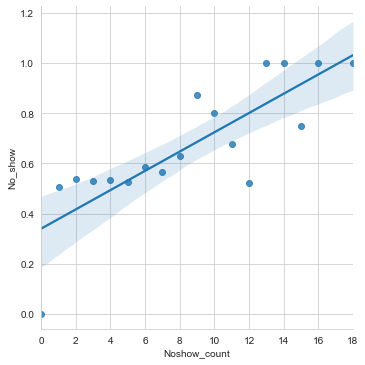

In [115]:
# mean no-show value per ns-count
nscount_means = pd.DataFrame(df.groupby(['Noshow_count']).No_show.mean().reset_index())
# Scatterplot to visualize the relationship between Noshow-count and No Shows
sns.lmplot(x='Noshow_count',y='No_show',data=nscount_means,fit_reg=True) 

In [119]:
corr1 = df.No_show. corr(df.Noshow_count)
corr2 = nscount_means.No_show. corr(nscount_means.Noshow_count) 
corr1, corr2

(0.4625192256057154, 0.8227098231921883)

Problem: predicting sth with (partly) itself....

<a id='q5'></a>
### Q5: How is age related to no-shows?

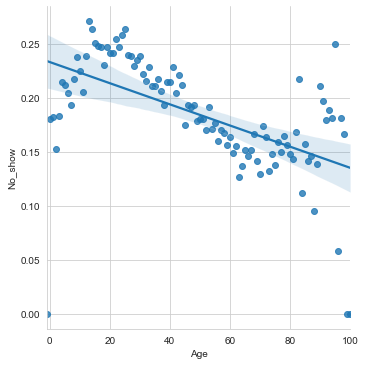

In [290]:
# mean no-show value per Age
noshow_means_age = pd.DataFrame(df.groupby(['Age']).No_show.mean().reset_index())
# delete outliers > 100
indexes = noshow_means_age[ noshow_means_age['Age'] > 100 ].index
noshow_means_age.drop(indexes , inplace=True)
# Scatterplot to visualize the relationship between Age and No Shows
sns.lmplot(x='Age',y='No_show',data=noshow_means_age,fit_reg=True) 

- teenagers show the highest probability for a now-show
- after the age of around 16: the older the patient the lower the risk for a no-show
- in old age the field widens, some patients become more unreliable, some more reliable

### Multiple Regression

In [303]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [ ]:
# linearity is kind of there :D 

In [314]:
# Regeression Model with sklearn
# define X and Y
X = df[['Waiting_Days', 'SMS', 'Age', 'Diabetes', 'Alcoholism']] 
Y = df['No_show']
# fit model
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.17737937733870024
Coefficients: 
 [ 0.00436982  0.0559954  -0.00118285  0.01636858  0.03404555]


In [315]:
# statistical info from statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                No_show   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1016.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        14:53:08   Log-Likelihood:                -52301.
No. Observations:              109660   AIC:                         1.046e+05
Df Residuals:                  109654   BIC:                         1.047e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1774      0.002     73.378   

In [ ]:
#  all factors are significantly correlated with the dependent variable (p<0.05)

<a id='conclusions'></a>
## Conclusions

Some factors are correlated with higher risk for a noshow:

    - Waiting Days (especially up to 80 days)
    the average waiting time of show ups lies at around 7 days, the average waiting time of no-shows is more than double at about 16 days. therfore it is probably advisable to plan appointments rather short-term
    
    - SMS reminder 
    the percentage of no-shows is higher among SMS receivers. here it would make sense to further investigate why SMS reminders are linked to nowhos, maybe the subset was preselected? We dont have information on that
    
    - Diabetis
    
    - Alcoholism
    
The one factor that seems to reduce no-shows is:

    - Patients' Age 
    After the age of around 16: the older the patient the lower the general risk for a no-show

#### external ressources: N/A 